<a href="https://colab.research.google.com/github/hrbae/LG_AI_training/blob/main/M1_Proces_Innovationby_ML/Practice_1_2_Process_Discovery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.Process Discovery
* **Alpha miner**
* **Heuristic miner**
* **Inductive miner**
*  Genetic miner
*  Fuzzy miner...







In [1]:
# !pip install pm4py

In [2]:
# 필요 라이브러리 호출
import pm4py
from pm4py.objects.log.util import dataframe_utils
from pm4py.objects.conversion.log import converter as log_converter
import pandas as pd
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.visualization.process_tree import visualizer as pt_visualizer
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer

In [3]:
#Colab drive 모듈 이용하여 연동
from google.colab import drive
drive.mount('/content/gdriv')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
# 실습용 데이터 호출
init_log = pd.read_csv('https://raw.githubusercontent.com/yongzzai/LGPracticum/main/eventlog%20(2).csv')
print(init_log.columns)
init_log['CustomerID']=init_log['CustomerID'].astype(str)
init_log['TIMESTAMP']=pd.to_datetime(init_log['TIMESTAMP'])
init_log.dtypes

Index(['CustomerID', 'PAGE_NAME', 'TIMESTAMP', 'AgeCategory_x', 'Gender_x',
       'ComplaintTopicID'],
      dtype='object')


CustomerID                  object
PAGE_NAME                   object
TIMESTAMP           datetime64[ns]
AgeCategory_x               object
Gender_x                    object
ComplaintTopicID           float64
dtype: object

In [ ]:
eventlog=init_log.copy()
eventlog.rename(columns={'TIMESTAMP':'time:timestamp',
                          'CustomerID':'case:concept:name',
                          'PAGE_NAME':'concept:name'}, inplace=True)
log=log_converter.apply(eventlog)
print(log)

[{'attributes': {'concept:name': '2025826'}, 'events': [{'concept:name': '50plus', 'time:timestamp': Timestamp('2015-10-05 10:12:56.880000'), 'AgeCategory_x': '50-65', 'Gender_x': 'M', 'ComplaintTopicID': 59.0}, '..', {'concept:name': 'home', 'time:timestamp': Timestamp('2015-09-21 20:42:31.277000'), 'AgeCategory_x': '50-65', 'Gender_x': 'M', 'ComplaintTopicID': 24.0}]}, '....', {'attributes': {'concept:name': '2038848'}, 'events': [{'concept:name': 'wdo', 'time:timestamp': Timestamp('2015-11-04 15:14:21.140000'), 'AgeCategory_x': '50-65', 'Gender_x': 'M', 'ComplaintTopicID': 33.0}]}]


In [ ]:
# top 45개의 Variant로 필터링
top45 = pm4py.filter_variants_top_k(log, k = 45)
print(top45)

/usr/local/lib/python3.10/dist-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


[{'attributes': {'concept:name': '1198689'}, 'events': [{'concept:name': 'mijn_cv', 'time:timestamp': Timestamp('2015-09-01 07:53:28.930000'), 'AgeCategory_x': '18-29', 'Gender_x': 'M', 'ComplaintTopicID': 31.0}]}, '....', {'attributes': {'concept:name': '2038848'}, 'events': [{'concept:name': 'wdo', 'time:timestamp': Timestamp('2015-11-04 15:14:21.140000'), 'AgeCategory_x': '50-65', 'Gender_x': 'M', 'ComplaintTopicID': 33.0}]}]


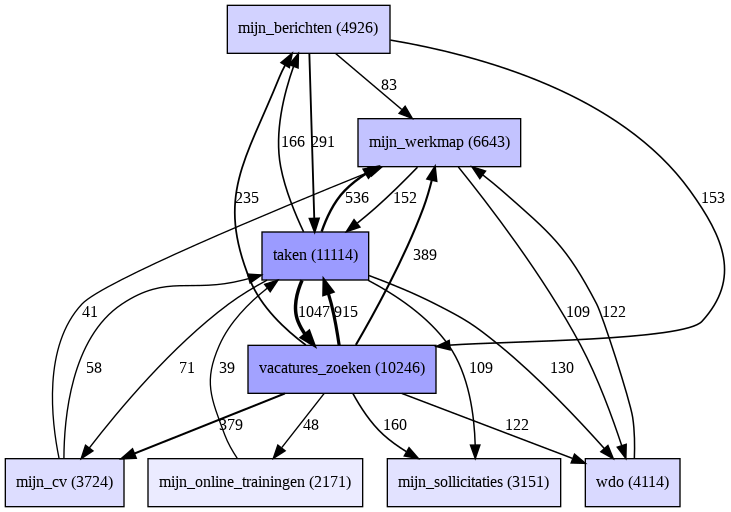

In [ ]:
#Directly followed graph(프로세스맵 도출)
#FREQUENCY: 빈도
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.visualization.dfg import visualizer as dfg_visualization
dfg=dfg_discovery.apply(top45)
gviz1=dfg_visualization.apply(dfg, log=log, variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz1)

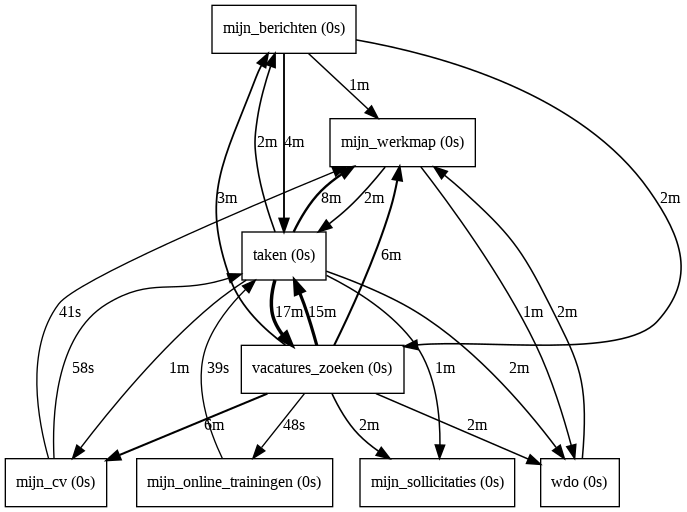

In [ ]:
#PERFORMANCE: 소요시간
dfg=dfg_discovery.apply(top45, variant=dfg_discovery.Variants.FREQUENCY)
#실습1> Performace관점에서의 visualization



/usr/local/lib/python3.10/dist-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


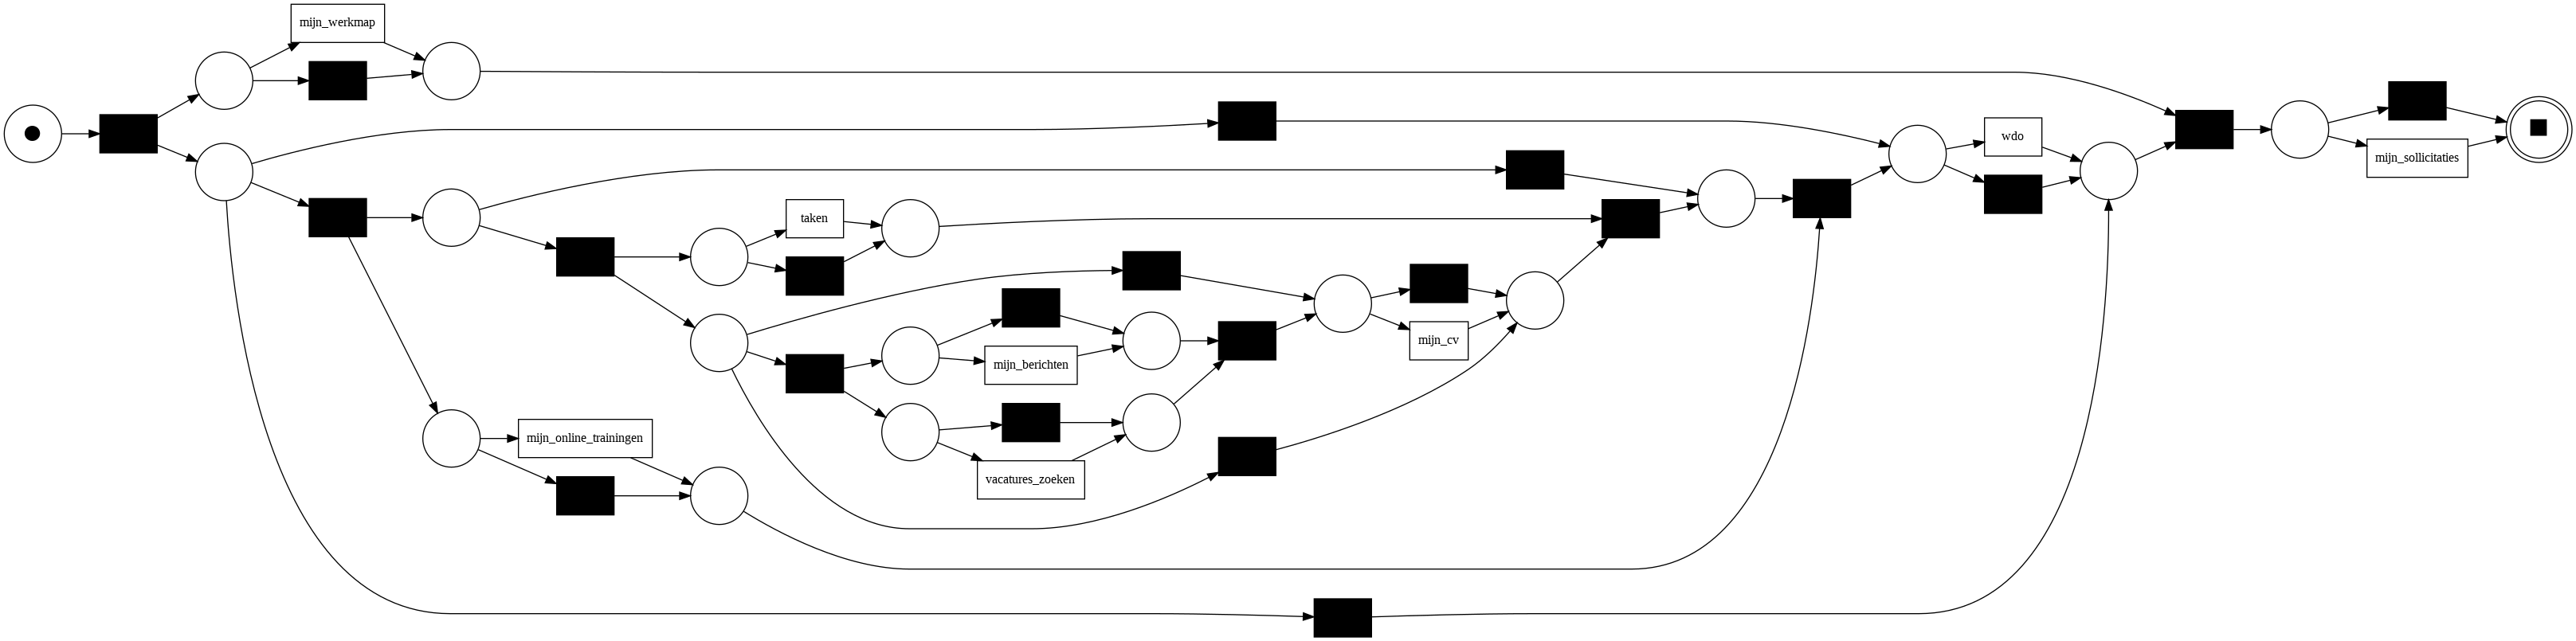

In [ ]:
#Inductive miner, Petrinet
net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(top45)
pm4py.view_petri_net(net, initial_marking, final_marking)

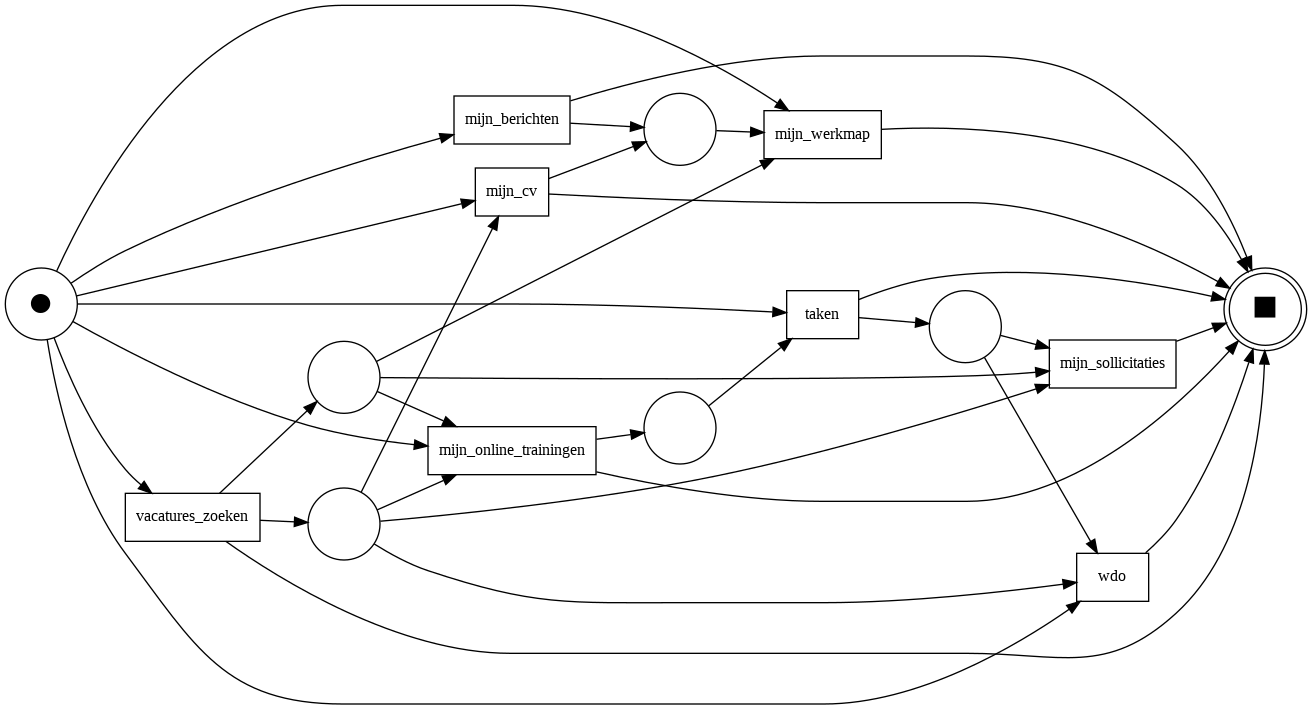

In [ ]:
# Alpha miner, Petrinet
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.visualization.petri_net import visualizer as pn_visualizer
net, initial_marking, final_marking = alpha_miner.apply(top45)
#실습2> petrinet_alpha visualization



{'vacatures_zoeken': (node:vacatures_zoeken connections:{mijn_cv:[0.9973684210526316], wdo:[0.991869918699187], mijn_werkmap:[0.9974358974358974], mijn_sollicitaties:[0.9937888198757764]}), 'mijn_cv': (node:mijn_cv connections:{}), 'wdo': (node:wdo connections:{}), 'mijn_werkmap': (node:mijn_werkmap connections:{}), 'mijn_sollicitaties': (node:mijn_sollicitaties connections:{}), 'taken': (node:taken connections:{wdo:[0.9923664122137404], mijn_sollicitaties:[0.990909090909091]})}


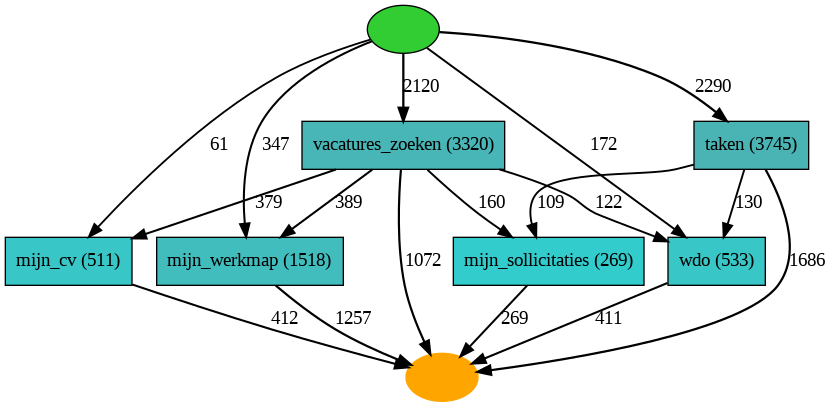

In [ ]:
# Heuristic miner
heu_net = heuristics_miner.apply_heu(top45, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})
print(heu_net)
gviz = hn_visualizer.apply(heu_net)
hn_visualizer.view(gviz)

#2.프로세스 Discovery 품질 척도
---

*   *Fitness*
*   *Precision*
*   *Generalization*
*   *Simplicity*


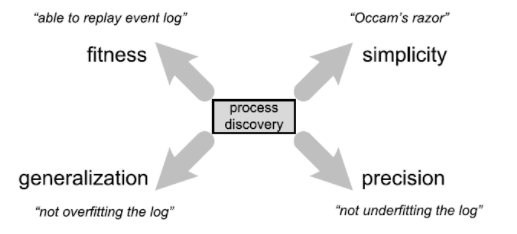


In [ ]:
# fitness
from pm4py.algo.evaluation.replay_fitness import algorithm as replay_fitness_evaluator
net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(top45)
fitness = replay_fitness_evaluator.apply(log, net, initial_marking, final_marking, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
print(fitness)    

replaying log with TBR, completed variants ::   0%|          | 0/5919 [00:00<?, ?it/s]

{'perc_fit_traces': 80.03549829082303, 'average_trace_fitness': 0.9805879693791689, 'log_fitness': 0.9818018225833982, 'percentage_of_fitting_traces': 80.03549829082303}


In [ ]:
# precision
from pm4py.algo.evaluation.precision import algorithm as precision_evaluator
prec = precision_evaluator.apply(log, net, initial_marking, final_marking, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print(prec)        

replaying log with TBR, completed variants ::   0%|          | 0/8668 [00:00<?, ?it/s]

0.904009029176927


In [ ]:
# generalization
from pm4py.algo.evaluation.generalization import algorithm as generalization_evaluator
gen = generalization_evaluator.apply(log, net, initial_marking, final_marking)
print(gen)

replaying log with TBR, completed variants ::   0%|          | 0/5919 [00:00<?, ?it/s]

0.9817688270403876


In [ ]:
#실습3>simplicity 




0.6097560975609756


#프로세스 모델로부터 이벤트데이터 생성

In [ ]:
# 프로세스 모델로부터 가상의 시뮬레이션을 통해 가상의 이벤트 데이터를 생성
from pm4py.algo.simulation.playout.petri_net import algorithm as simulator
simulated_log = simulator.apply(net, initial_marking, variant=simulator.Variants.BASIC_PLAYOUT, parameters={simulator.Variants.BASIC_PLAYOUT.value.Parameters.NO_TRACES: 50})
dt = log_converter.apply(simulated_log, variant=log_converter.Variants.TO_DATA_FRAME)
print(dt)           

              concept:name            time:timestamp case:concept:name
0       mijn_sollicitaties 1970-04-26 17:46:40+00:00                 0
1             mijn_werkmap 1970-04-26 17:46:41+00:00                 1
2       mijn_sollicitaties 1970-04-26 17:46:42+00:00                 2
3       mijn_sollicitaties 1970-04-26 17:46:43+00:00                 3
4                      wdo 1970-04-26 17:46:44+00:00                 4
..                     ...                       ...               ...
72                     wdo 1970-04-26 17:47:52+00:00                47
73  mijn_online_trainingen 1970-04-26 17:47:53+00:00                49
74                   taken 1970-04-26 17:47:54+00:00                49
75            mijn_werkmap 1970-04-26 17:47:55+00:00                49
76                     wdo 1970-04-26 17:47:56+00:00                49

[77 rows x 3 columns]
